## Unsupervised - K-Means Clustering
Using the Kaggle dataset 'ccdata' from https://www.kaggle.com/arjunbhasin2013/ccdata we will apply it to a K-Means Clustering model.

In [2]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [73]:
# Download the data, and load it into a pandas dataframe
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### What do the clustering patterns of credit limit vs balance look like?
BALANCE : Balance amount left in their account to make purchases

CREDIT_LIMIT : Limit of Credit Card for user

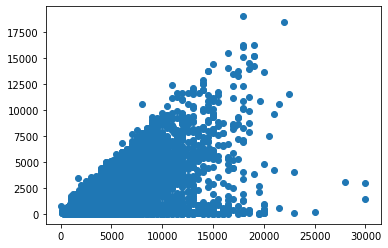

In [74]:
plt.scatter(df['CREDIT_LIMIT'], df['BALANCE'])

In [75]:
# Reviewing columns for missing values, we find one NaN in CREDIT_LIMIT
#df['BALANCE'].isnull().sum()
df['CREDIT_LIMIT'].isnull().sum()
#df['TENURE'].isnull().sum()

1

In [76]:
# Removing the NaN for our model
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)
print(df.shape)

(8949, 18)


In [77]:
# Create a new dataframe containing the data we want and assign to the X-axis
X = df[['CREDIT_LIMIT','BALANCE']].copy()

In [78]:
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      203
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [79]:
# Use tenure for our Y-axis
Y = df['TENURE']

In [98]:
# Start the K-Means function and set our clusters = Tenure values
kmeans = KMeans(n_clusters=7)
# The model will calculate the centroids, then classify the data based on distance
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
print(kmeans.cluster_centers_)

[[ 3381.69567819   907.26424037]
 [ 9620.80567989  5583.70923344]
 [14741.98895028  9624.1119118 ]
 [ 7472.65325348   758.67077333]
 [ 1376.52391849   660.2197356 ]
 [14729.53667954  1115.90057365]
 [ 5629.41874259  3817.31192068]]


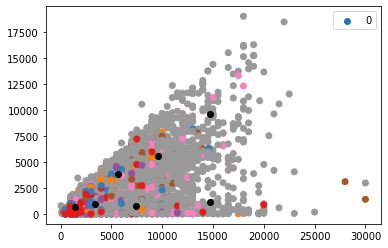

In [88]:
# Generate a scatter plot with df features, based on Tenure
plt.scatter(df['CREDIT_LIMIT'], df['BALANCE'], c=df['TENURE'], cmap='Set1')
# Apply the x,y for our kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [89]:
# Now we will add the new CLUSTER column to our original dataframe
# Using it to compare other features of the model
df['CLUSTER'] = kmeans.labels_

In [90]:
df['CLUSTER'].value_counts()

4    3059
0    2669
3    1350
6     843
1     588
5     259
2     181
Name: CLUSTER, dtype: int64

Text(0, 0.5, 'Balance')

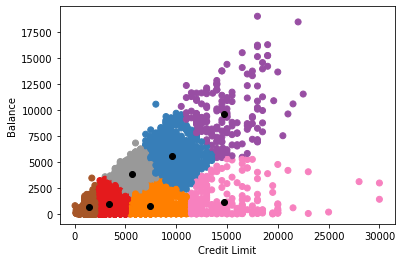

In [91]:
# Now we cluster our data using the calculated centroid postions
# c=df['CLUSTER']
plt.scatter(df['CREDIT_LIMIT'], df['BALANCE'], c=df['CLUSTER'], cmap='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')

In [118]:
# Test a prediction:
kpred = [8050, 3600]
print(kmeans.predict([kpred]))

[2]


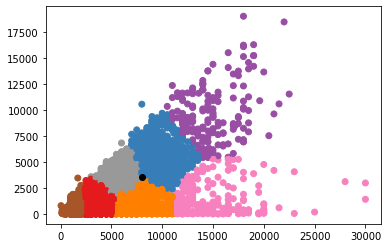

In [119]:
# Plot the prediction
plt.scatter(df['CREDIT_LIMIT'], df['BALANCE'], c=df['CLUSTER'], cmap='Set1')
plt.scatter(kpred[0],kpred[1],c='black')

### What do the clustering patterns of payments vs purchases look like?
PURCHASES : Amount of purchases made from account

PAYMENTS : Amount of Payment done by user 

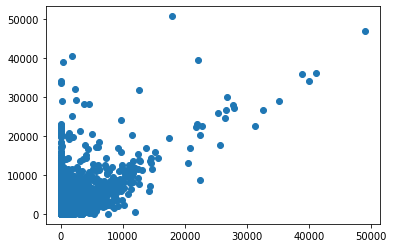

In [92]:
plt.scatter(df['PURCHASES'], df['PAYMENTS'])

In [94]:
# Reviewing columns for missing values, we find one NaN in CREDIT_LIMIT
#df['PURCHASES'].isnull().sum()
#df['PAYMENTS'].isnull().sum()
# No NaN/Null values found

0

In [96]:
# Create a new dataframe containing the data we want and assign to the X-axis
X2 = df[['PURCHASES','PAYMENTS']].copy()

In [99]:
# Start the K-Means function and set our clusters = Tenure values
kmeans2 = KMeans(n_clusters=7)
# The model will calculate the centroids, then classify the data based on distance
kmeans2.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [100]:
print(kmeans2.cluster_centers_)

[[  352.01284701   599.58381756]
 [ 4697.27401639  3963.03779831]
 [29175.132      29449.596683  ]
 [10242.6381     10189.14981192]
 [ 1286.45636453  2338.30436029]
 [ 2128.04065217 22344.92978935]
 [  814.69789157  7887.58354793]]


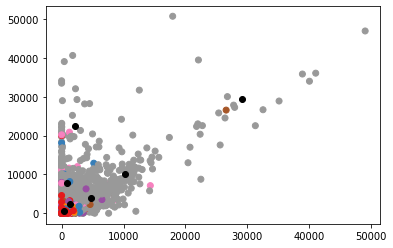

In [101]:
# Generate a scatter plot with df features, based on Tenure
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=df['TENURE'], cmap='Set1')
# Apply the x,y for our kmeans.cluster_centers_
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='black')

In [102]:
df['CLUSTER2'] = kmeans2.labels_

In [103]:
df['CLUSTER2'].value_counts()

0    5919
4    2044
1     488
6     332
3     100
5      46
2      20
Name: CLUSTER2, dtype: int64

Text(0, 0.5, 'Payments')

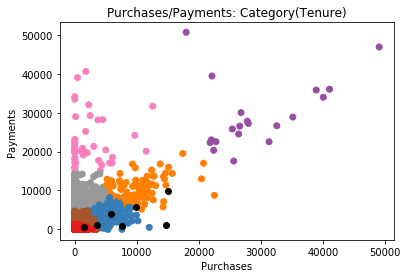

In [108]:
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=df['CLUSTER2'], cmap='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
plt.title('Purchases/Payments: Category(Tenure)')
plt.xlabel('Purchases')
plt.ylabel('Payments')

Text(0, 0.5, 'Payments')

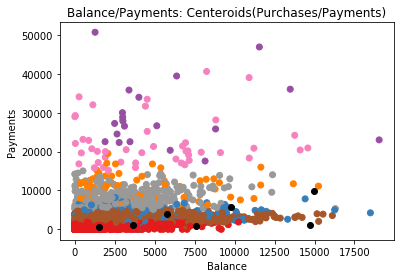

In [107]:
plt.scatter(df['BALANCE'], df['PAYMENTS'], c=df['CLUSTER2'], cmap='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
plt.title('Balance/Payments: Centeroids(Purchases/Payments)')
plt.xlabel('Balance')
plt.ylabel('Payments')